In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import InputLayer,Normalization,Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization
from tensorflow.keras.activations import relu,sigmoid
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy

In [4]:
dataset,dataset_info=tfds.load("malaria",with_info=True,split=['train[:80%]','train[80%:90%]','train[90%:]'],shuffle_files=True)

In [5]:
train_dataset=dataset[0]
val_dataset=dataset[1]
test_dataset=dataset[2]

In [6]:
print(len(val_dataset))

2756


In [7]:
for i in val_dataset.take(1):
  print(i)

{'image': <tf.Tensor: shape=(232, 229, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=0>}


In [8]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='C:\\Users\\HP\\tensorflow_datasets\\malaria\\1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blo

In [9]:
def get_label(label):
  if label==0:
    return "Parasitized"
  else:
    return "Uninfected"

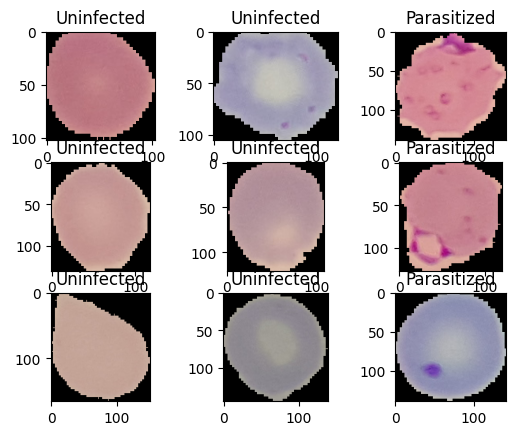

In [11]:
for i,sample in enumerate(train_dataset.take(9)):
  ax=plt.subplot(3,3,i+1)
  plt.imshow(sample['image'])
  plt.title(get_label(sample['label'].numpy()))

In [12]:
img_size=224
def resize_rescale(inputs):
  return tf.image.resize(inputs['image'],(img_size,img_size))/255,inputs['label']

In [13]:
train=train_dataset.map(resize_rescale).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val=val_dataset.map(resize_rescale).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
test=test_dataset.map(resize_rescale).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)


In [14]:
for image,label in test.take(1):
  print(image,label)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

In [15]:
np.unique(image)

array([0.0000000e+00, 3.8872047e-05, 3.9450093e-05, ..., 9.2144871e-01,
       9.2191833e-01, 9.2587167e-01], dtype=float32)

In [20]:
# y_true=[0.0,0.0,0.0,0.0]
# y_pred=[0.3,0.2,0.4,0.1]
# bce=BinaryCrossentropy()
# print(bce(y_true,y_pred))

#Model Creation

In [21]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(224,224,3)),
    Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    BatchNormalization(),
    Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu'),
    MaxPool2D(pool_size=2,strides=2),
    BatchNormalization(),
    Flatten(),
    Dense(100,activation='relu'),
    BatchNormalization(),
    Dense(10,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')

])
model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

In [22]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics=[BinaryAccuracy()]
    )

In [23]:
history=model.fit(
    train,
    validation_data=val,
    epochs=10,
    verbose=1
)

Epoch 1/10
528/689 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - binary_accuracy: 0.7552 - loss: 0.4871

In [ ]:
print(history.history)

{'loss': [0.44611436128616333, 0.2305396944284439, 0.24453683197498322, 0.21118374168872833, 0.18200257420539856, 0.2182781994342804, 0.17232109606266022, 0.16009967029094696, 0.1516537368297577, 0.14319875836372375], 'binary_accuracy': [0.7831805944442749, 0.9166288375854492, 0.9107774496078491, 0.927560567855835, 0.9373582601547241, 0.9242039322853088, 0.9398530125617981, 0.9427106976509094, 0.9478816986083984, 0.9526444673538208], 'val_loss': [0.2498830258846283, 0.5793781280517578, 1.7588703632354736, 0.5833303332328796, 0.41082319617271423, 0.5645046830177307, 0.4186020791530609, 0.3916321098804474, 1.2776858806610107, 26.533559799194336], 'val_binary_accuracy': [0.9089259505271912, 0.5830914378166199, 0.5036284327507019, 0.5664005875587463, 0.8846153616905212, 0.6226415038108826, 0.7376632690429688, 0.7793903946876526, 0.53447026014328, 0.9383164048194885]}


<function matplotlib.pyplot.show(close=None, block=None)>

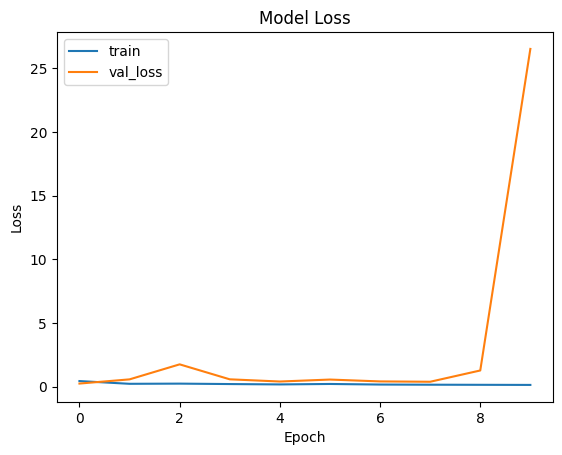

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train",'val_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

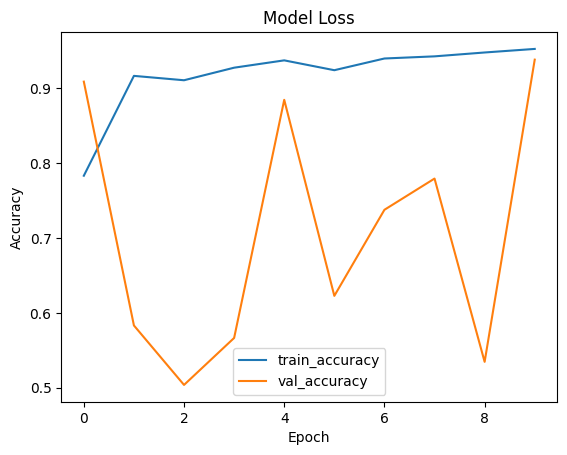

In [ ]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model Loss')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train_accuracy",'val_accuracy'])
plt.show

In [ ]:
model.evaluate(test)

87/87 [==============================] - 2s 18ms/step - loss: 4.7949 - binary_accuracy: 0.9485


[4.794879913330078, 0.9484760761260986]

In [ ]:
def parasite_or_not(x):
  if x<0.5:
    return str('P')
  else:
    return str('U')

In [ ]:
out=parasite_or_not(model.predict(test.take(1))[0])
print(out)

1/1 [==============================] - 0s 184ms/step
U


In [ ]:
for image,label in test.take(1):
  for i in range(16):
    ax=plt.subplot(4,4,i+1)
    plt.imshow(image[i])
    plt.title(parasite_or_not(label.numpy()[i])+"-"+parasite_or_not(model.predict(image)[i][0]))
    plt.axis('off')

NameError: name 'test' is not defined